В качестве набора данных я буду использовать собственный датасет, который я создал сам на основании общедоступных данных из википедии и других данных. Это список некоторых стран со следующими признаками: Население (чел.), ВВП ($/душу населения), среднегодовая температура воздуха (гр. С) и количество производимой (генерируемой) электроэнергии (TW/h). Я решил посмотреть зависимость объема генерации электроэнергии, от других признаков, которые я посчитал подходящими. Данные брались за 2021 год.


In [ ]:
import numpy as np
import pandas as pd

Создал таблицу в Excel, сохранил в формате CSV.
Cчитываем данные:

In [ ]:
DATA = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS.csv", delimiter=';', index_col='Country')
DATA

,Population,GDP,Temperature,Consumption
Country,,,,
Belgium,11476279,50412.0,"11,3",100
Czechia,10693939,25806.0,"8,9",85
France,68959599,45028.0,"12,8",555
Germany,83349300,50787.0,"10,3",584
Italy,59236213,35584.0,"13,3",287
Netherlands,17730745,57714.0,"11,3",120
Poland,38313035,17318.0,"9,4",181
Portugal,10347892,24457.0,"15,9",50
Romania,19401658,14863.0,"11,1",59


Предварительная обработка данных.
Как видим, мы имеем датасет с некоторыми пропущенными данными. Их немного, поэтому просто удалим их. 
Также в столбце 'Temperature' Запятую заменяю на точку.

In [ ]:
train_data = DATA.drop(['Taiwan','Malaysia'])


In [ ]:
train_data['Temperature'] = train_data['Temperature'].str.replace(',', '.')
train_data.head()

,Population,GDP,Temperature,Consumption
Country,,,,
Belgium,11476279,50412.0,11.3,100
Czechia,10693939,25806.0,8.9,85
France,68959599,45028.0,12.8,555
Germany,83349300,50787.0,10.3,584
Italy,59236213,35584.0,13.3,287


Постановка задачи и построение модели. 
Ставим задачу предсказания объема производства электроэнергии. 
Будем использовать модель линейной регресии.

Отберем данные для предикторов, удаление последнего столбца

In [ ]:
X = pd.DataFrame(train_data.drop(['Consumption'], axis=1))

Отберем данные для отклика (последний столбец)

In [ ]:
y = pd.DataFrame(train_data['Consumption'])

Подключу модель логистической регрессии из библиотеки sklearn и обучу модель.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X, y)

Предскажем потребление для страны, которой нет в нашем списке.
Например Филиппины с населением 114 597 229 человека, ВВП 9356$/чел и средней температурой 27.2 градуса.

In [ ]:
reg.predict([[114597229, 9356, 27.2]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.0697776]])

Предпологаемый объем генерации страны Филиппины за год, согласно нашей модели, составил 50.069 TW/h

Для оценки модели определим коэффициент детерминации

In [ ]:
y_predicted = reg.predict(X)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y, y_predicted)

0.6464924001907413

Значение коэффициента детерминации 0,65 - небольшое. Модель не идеальна. 

Также можем попробовать уменьшить количество признаков, и определить долю объясненной дисперсии при использовании, например, двух главных компонент.

Для этого сначала нормируем данные

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

names = X.columns
country = X.index
d = scaler.fit_transform(X)

Xsc = pd.DataFrame(d, columns=names, index=country)
Xsc.head()

,Population,GDP,Temperature
Country,,,
Belgium,0.005593,0.603799,0.352060
Czechia,0.005042,0.297537,0.262172
France,0.046007,0.536786,0.408240
Germany,0.056124,0.608466,0.314607
Italy,0.039171,0.419240,0.426966


Подключем модуль Метода главных компонент и обучим модель.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2, svd_solver = 'full') 
pca.fit(Xsc)
pca_data = pca.transform(Xsc)

Мы хотим вычислить долю объясненной дисперсии при использовании двух ГК. Для этого построим 3 ГК, тк изначально объекты обладали тремя признаками.

In [ ]:
pca = PCA(n_components = 3, svd_solver = 'full') 
pca_data = pca.fit_transform(Xsc)

Доля объясненной дисперсии для каждой ГК хранится в поле explained_variance_ratio_, используем сумму с накоплением: np.cumsum 

In [ ]:
pca.explained_variance_ratio_

array([0.58163164, 0.21958944, 0.19877892])

In [ ]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance

array([0.58163164, 0.80122108, 1.        ])

При использовании первых двух ГК доля объясненной дисперсии составляет примерно 0.8.
Неплохое значение 
Построим график зависимости доли объясненной дисперсии от количества используемых ГК.

In [ ]:
import seaborn as sns


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


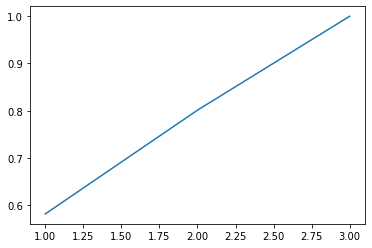

In [ ]:
sns.lineplot(np.arange(1, 4), explained_variance)